In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [19]:
transpose_df = pd.DataFrame(data).transpose()

In [20]:
transpose_df

,0,1,2,3,4,5,6,7,8,9,...,41990,41991,41992,41993,41994,41995,41996,41997,41998,41999
0,4,8,5,3,5,3,0,7,3,5,...,3,8,6,3,2,8,6,4,4,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
n

785

In [34]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [35]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [38]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    # Parameters initalized weights and biases
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        # One forward pass
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [41]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)


Iteration:  0
[7 7 7 ... 7 5 7] [8 2 5 ... 1 7 4]
0.12082926829268292
Iteration:  100
[1 4 5 ... 1 8 0] [8 2 5 ... 1 7 4]
0.6717317073170732
Iteration:  200
[8 4 5 ... 1 7 0] [8 2 5 ... 1 7 4]
0.7859512195121952
Iteration:  300
[8 4 5 ... 1 7 9] [8 2 5 ... 1 7 4]
0.8256097560975609
Iteration:  400
[8 4 5 ... 1 7 9] [8 2 5 ... 1 7 4]
0.8454146341463414


In [47]:
len(W1), len(b1), len(W2), len(b2)

(10, 10, 10, 10)

In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


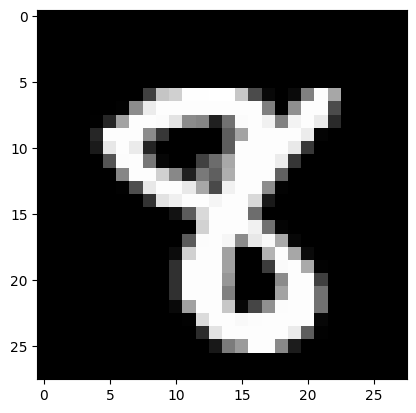

Prediction:  [4]
Label:  2


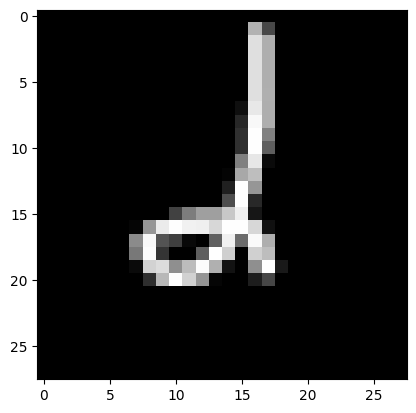

Prediction:  [5]
Label:  5


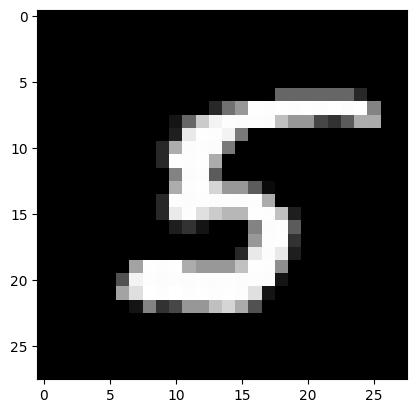

Prediction:  [0]
Label:  0


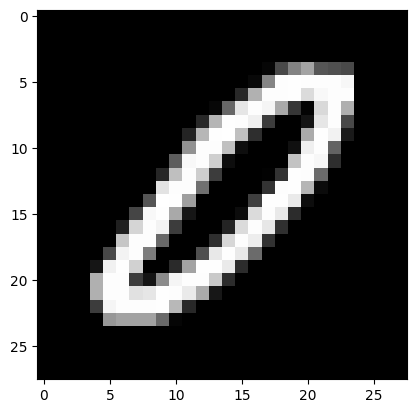

In [43]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [44]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 2 4 1 0 9 3 8 9 2 6 0 3 8 7 4 2 5 1 6 8 1 9 3 9 3 1 2 5 3 3 1 2 8 8 1 3
 9 7 3 1 2 9 3 6 0 4 2 7 5 8 1 6 1 1 3 6 7 2 5 1 1 0 9 9 6 7 2 2 8 0 9 0 3
 4 8 4 6 3 4 7 8 0 9 7 3 1 3 8 0 7 9 3 8 3 0 1 7 2 8 7 8 3 5 0 5 7 7 8 5 8
 6 1 9 2 0 5 1 0 3 2 4 2 4 4 9 6 4 1 0 5 4 9 3 1 3 5 7 5 0 9 8 9 9 4 8 1 4
 1 5 6 2 6 7 1 7 1 6 2 8 1 6 7 3 4 7 5 9 9 9 0 4 6 1 1 7 2 2 4 0 9 7 5 1 4
 7 5 7 1 1 2 7 1 3 3 6 7 9 0 2 9 7 2 6 4 2 2 1 3 9 9 0 7 5 6 0 5 7 9 9 3 9
 9 4 9 0 3 7 1 3 2 3 2 0 5 5 0 4 1 2 4 7 4 8 4 2 4 2 3 3 4 4 7 5 4 1 5 9 6
 2 6 6 9 9 1 2 4 1 7 2 2 3 6 6 7 4 5 6 1 2 1 4 4 3 2 1 4 5 8 0 6 8 1 2 7 9
 6 7 8 2 6 9 3 6 4 9 6 5 8 9 3 0 1 6 7 1 6 9 1 5 1 7 9 9 8 7 6 2 3 1 5 6 8
 8 2 1 2 0 7 1 4 7 4 2 2 9 6 8 6 7 4 0 8 4 0 3 4 2 8 2 7 0 7 0 4 2 5 9 5 1
 7 3 8 0 0 4 8 0 1 5 5 9 4 5 8 9 7 2 5 3 7 9 8 0 8 1 3 1 5 3 5 6 8 6 4 6 4
 4 1 8 8 1 7 4 4 9 4 8 9 5 6 2 8 7 5 5 8 6 4 9 4 5 8 8 1 6 4 2 0 2 6 9 6 1
 1 5 1 1 0 1 1 3 9 5 0 7 7 1 6 2 4 2 2 2 6 4 7 8 6 5 2 9 6 6 4 1 1 6 4 2 8
 5 9 3 5 4 0 9 6 5 6 9 1 

0.831